In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# Import data from csv.
df = pd.read_csv('./NewRegressionData.csv', encoding="UTF-8")
EDAdf = df.copy()
EDAdf.dtypes

Gearing                 float64
Asset_Tangability       float64
Size                    float64
Growth_Opportunities    float64
Profitability           float64
Non_Debt_Tax_Shields    float64
Concentrated              int64
dtype: object

In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
EDAdf.describe()

,Gearing,Asset_Tangability,Size,Growth_Opportunities,Profitability,Non_Debt_Tax_Shields,Concentrated
count,361.000,361.000,361.000,361.000,361.000,361.000,361.000
mean,90.360,0.443,12.563,2.951,0.101,0.029,0.742
std,107.595,0.296,2.364,3.163,0.085,0.030,0.438
min,0.700,-0.274,6.312,0.367,-0.401,-0.001,0.000
25%,27.910,0.207,10.841,1.200,0.064,0.009,0.000
50%,57.570,0.421,12.544,1.990,0.097,0.020,1.000
75%,111.760,0.683,14.266,3.617,0.140,0.041,1.000
max,890.820,0.994,19.116,27.250,0.416,0.171,1.000


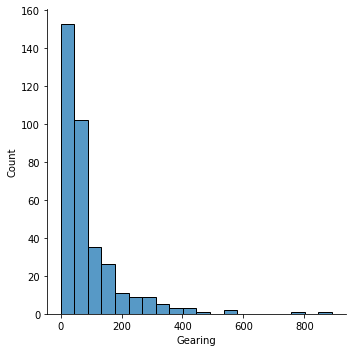

In [43]:
sns.displot(EDAdf["Gearing"], kde=False, bins=20)

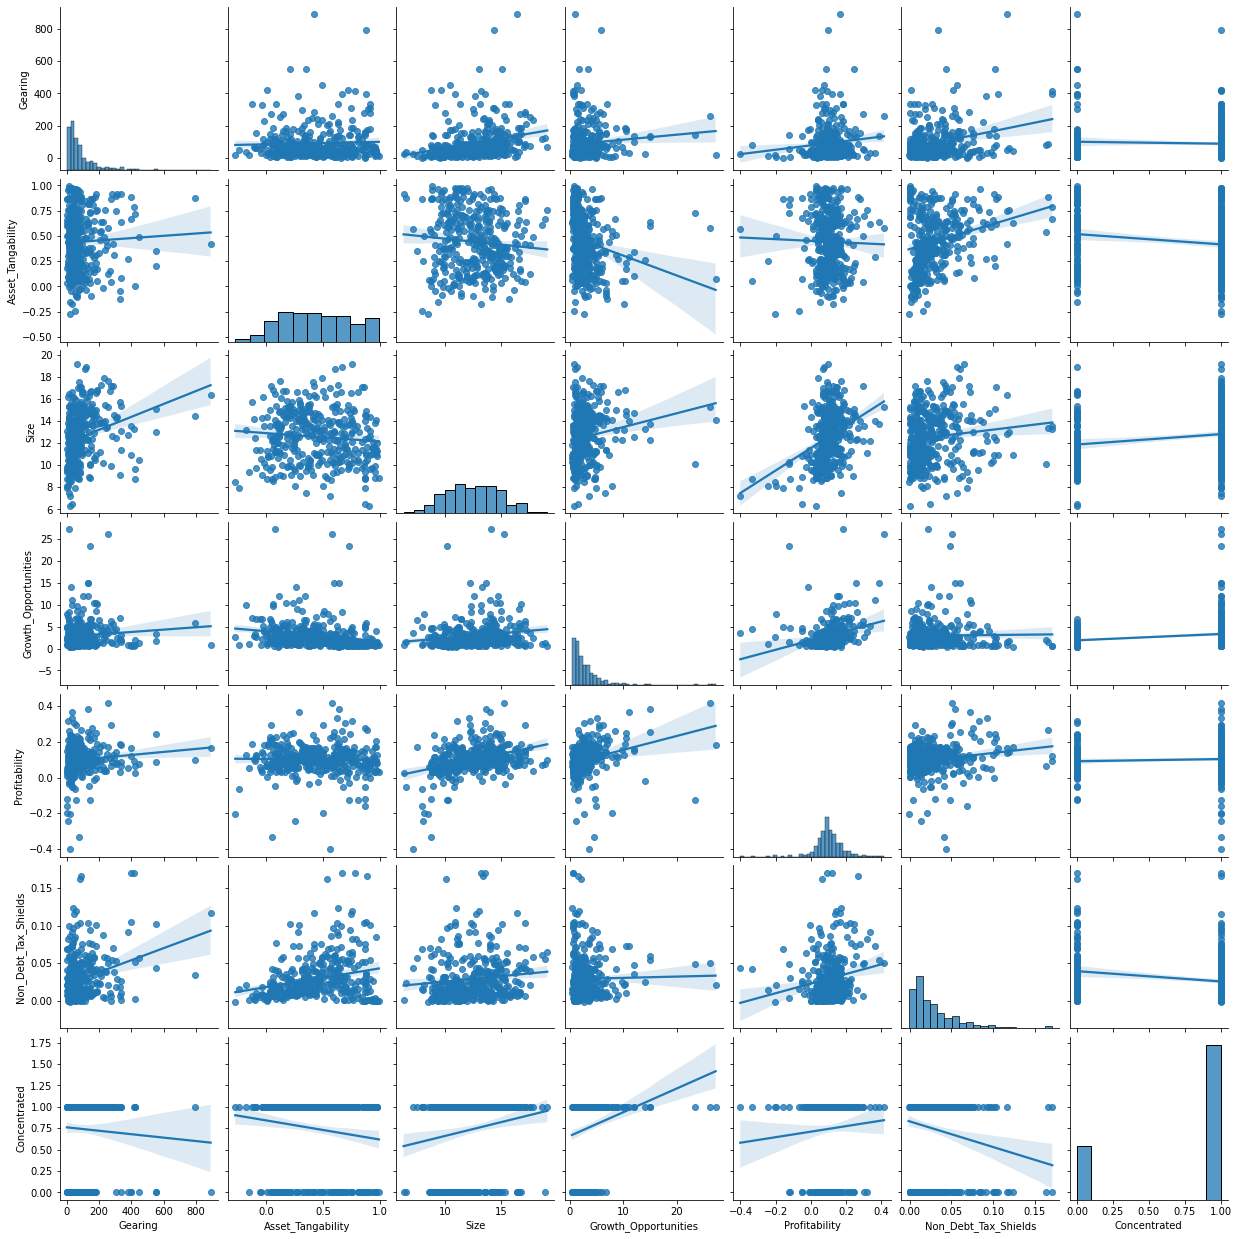

In [44]:
sns.pairplot(EDAdf, kind="reg", )

<AxesSubplot:>

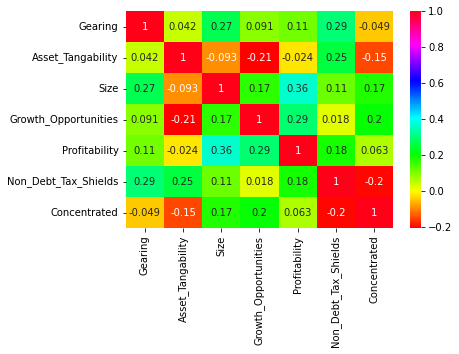

In [45]:
# correlation heatmap
corr = EDAdf.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="hsv", annot=True)

<AxesSubplot:xlabel='Concentrated', ylabel='Gearing'>

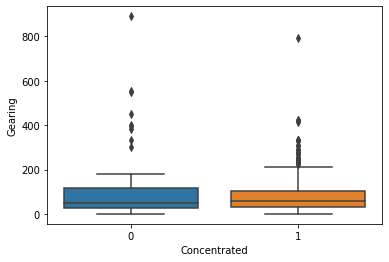

In [46]:
sns.boxplot(x="Concentrated", y="Gearing", data=EDAdf)